# Tutorial: Using Graph Space

Lead author: Anna Calissano.

In this tutorial, we show how to use geomstats.graphspace to perform analysis in Graph Space. Graph Space is a quotient space obtained by applying the nodes permutation action to the space of adjececy matrices (i.e. the Euclidean Space).

## Setup

In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
from geomstats.geometry.graphspace import GraphSpace, GraphSpaceMetric
import networkx as nx

## Sampling and Visualization

We are going to randomly sample observations from graphspace (i.e. adjecency matrices) given a certain number of nodes and visualiza them. The visualization is done using networkx.

In [13]:
nodes=5
observations=10
graphspace=GraphSpace(nodes)
graphset=graphspace.random_point(observations)

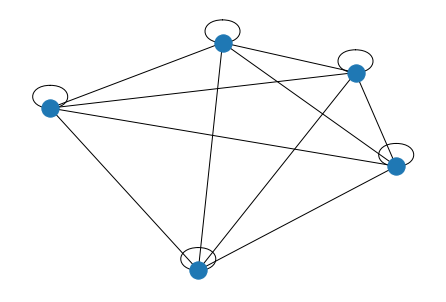

In [14]:
graph_nx=nx.from_numpy_matrix(graphset[0])
nx.draw(graph_nx)

## Metric

Given two graphs, we can define a metric on the space of adjecency matrix. Given a metric in the total space (i.e. the space of adjecency matrices), we can define a metric on the quotient space as minimizing the distance between the elements of the equivalence classes. This correspondes to finding the permutation matrix minimizing the distance between two adjecency matrices. 
The graph matching problem has been broadly studied in literature (see [[CONTE2004]](#References) for a review). In the module, we implemented two graph matching strategies:
- FAQ graph matching: minimizing the Frobenious distance by finding an optimal permutation matrix.
- ID graph matching: return the identy matrix.

The matching stategies can be imputed using the matcher parameter in the dist function.

Notice that the identity matching corresponds to the analysis of labelled graphs.

In [11]:
dist_ID=graphspace.metric.dist(graphset[0],graphset[1],matcher='ID')
dist_FAQ=graphspace.metric.dist(graphset[0],graphset[1],matcher='FAQ')
print(dist_ID, dist_FAQ)

2.128251227378618 1.5396350958195535


## Permutations

To visualize the actual permutation selected, the matching return the permutation function to apply to the nodes. The list of permutation shows in position i the nodes j, meaning the node i should be permuted with the node j.

In [12]:
graphspace.metric.faq_matching(graphset[0],graphset[1])

[0, 4, 1, 2, 3]

## References

References:

.. [CAL2020] Calissano, Anna, Aasa Feragen, and Simone Vantini. "Populations of unlabeled networks: Graph space geometry and geodesic principal components." MOX Report (2020).

.. [CONTE2004] Conte, Donatello, et al. "Thirty years of graph matching in pattern recognition." International journal of pattern recognition and artificial intelligence 18.03 (2004): 265-298